In [ ]:
# !pip install numpy==1.24.2
# !pip install seaborn==0.12.2
# !pip install pandas==1.5.3
# !pip install scikit-learn==1.2.1

In [ ]:
%%shell
jupyter nbconvert --to html %%shell
jupyter nbconvert --to html /content/FINAL_MODELS_NEW_TELCO.ipynb

[NbConvertApp] WARNING | pattern '%%shell' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute t

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#import pyodbc
import numpy as np
#from ydata_profiling import ProfileReport # for EDA report

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns

# **Step 1: Load and Understand the Dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Telco-Churn.csv", sep = ',', decimal='.')

# **Step 2: Preprocessing**

In [ ]:
# 'Total Charges' should be float, let's convert it to float64 type
# Using 'coerce' will replace non-convertible values with 'NaN'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Let's check for any missing data
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Let's separate categorical and numerical columns
cat_cols = [c for c in df.columns if df[c].dtype=="object" and c != 'customerID']
num_cols = [c for c in df.columns if df[c].dtype!="object"]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
# Change the name of the column Churn_yes to Churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [ ]:
df.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

#**Step 4: Outlier Detection**

In [ ]:
# new definition of numerical columns
num_cols = []

for col in df.columns:
    if df[col].nunique() >= 3 and col != 'customerID':
        num_cols.append(col)

print(num_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# new definition of categorical columns
cat_cols = []

for col in df.columns:
    if df[col].nunique() <= 3 and col != 'customerID':
        cat_cols.append(col)

print(cat_cols)

['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn']


# **Step 6: Correlation Heatmap**

<ipython-input-12-3d1845a86796>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


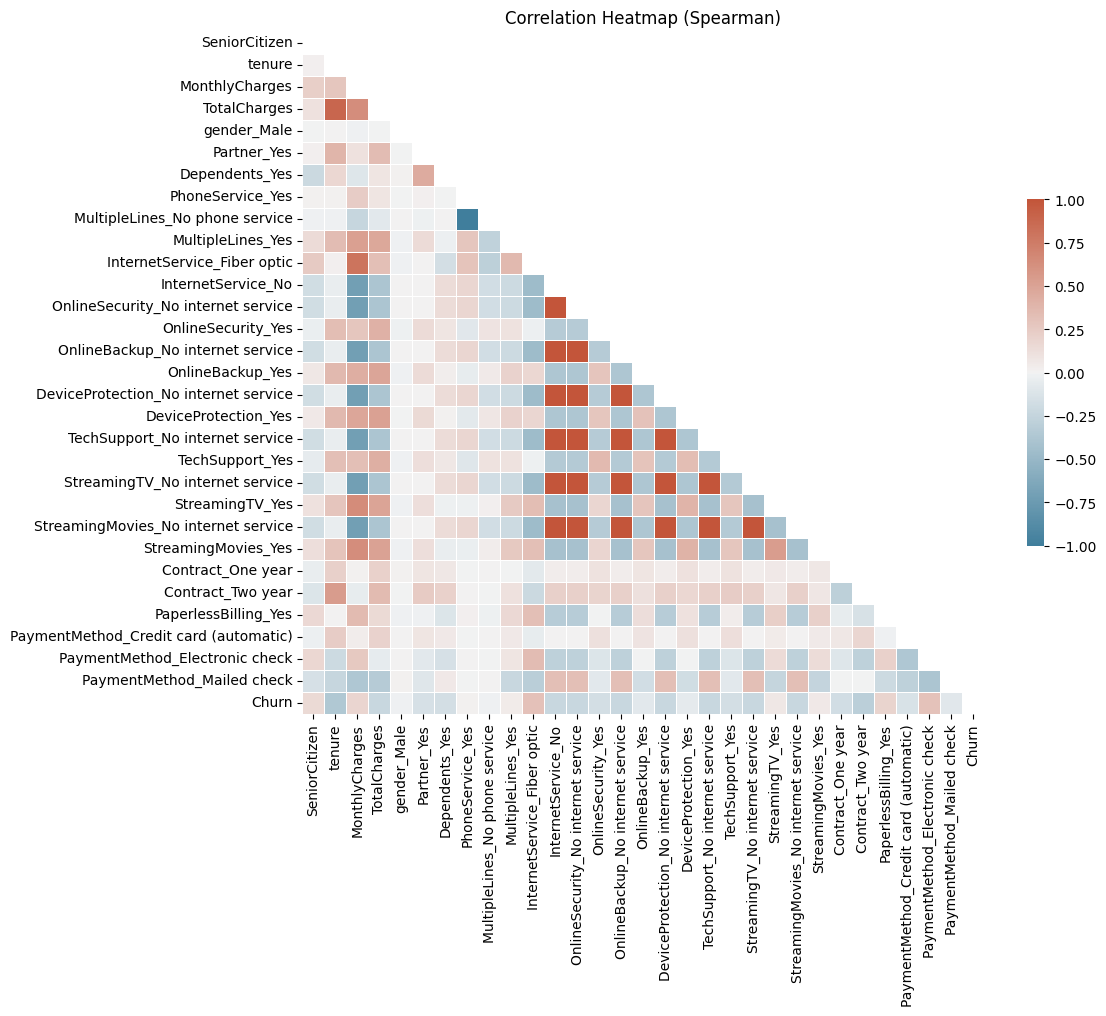

Pairs of variables with high correlation (>|0.8|):
('TotalCharges', 'tenure')
('MultipleLines_No phone service', 'PhoneService_Yes')
('InternetService_No', 'OnlineSecurity_No internet service')
('InternetService_No', 'OnlineBackup_No internet service')
('DeviceProtection_No internet service', 'InternetService_No')
('InternetService_No', 'TechSupport_No internet service')
('InternetService_No', 'StreamingTV_No internet service')
('InternetService_No', 'StreamingMovies_No internet service')
('OnlineBackup_No internet service', 'OnlineSecurity_No internet service')
('DeviceProtection_No internet service', 'OnlineSecurity_No internet service')
('OnlineSecurity_No internet service', 'TechSupport_No internet service')
('OnlineSecurity_No internet service', 'StreamingTV_No internet service')
('OnlineSecurity_No internet service', 'StreamingMovies_No internet service')
('DeviceProtection_No internet service', 'OnlineBackup_No internet service')
('OnlineBackup_No internet service', 'TechSupport

In [ ]:
# Compute the correlation matrix with Spearman method
corr = df.corr(method='spearman')

# Generate a mask for the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio, exclude the correlation values from the plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Heatmap (Spearman)')
plt.show()

# Find and print highly correlated pairs
highly_correlated = []
for column in corr.columns:
    for index in corr.index:
        if abs(corr.loc[index, column]) > 0.8 and index != column:
            pair = tuple(sorted((index, column)))
            if pair not in highly_correlated:
                highly_correlated.append(pair)

print("Pairs of variables with high correlation (>|0.8|):")
for pair in highly_correlated:
    print(pair)

# **Remove highly correlated**

In [ ]:
import pandas as pd
import numpy as np

# Assuming that df is your DataFrame and "Churn" is your target column

# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find pairs of features which correlation is more than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Find pairs of highly correlated features
highly_correlated_pairs = [(i, j) for i in upper.columns for j in upper.index if upper.loc[j, i] > 0.8]

# Prepare a list to store the columns to be dropped
final_drop = []

# Check each pair
for pair in highly_correlated_pairs:
    # If both columns of the pair are in the to_drop list, check which has a higher correlation with the target
    if pair[0] in to_drop and pair[1] in to_drop:
        # If the first item in the pair has a higher absolute correlation with the target, drop the second item in the pair
        if abs(df['Churn'].corr(df[pair[0]])) > abs(df['Churn'].corr(df[pair[1]])):
            final_drop.append(pair[1])
        else:
            final_drop.append(pair[0])

# Make sure final_drop is unique
final_drop = list(set(final_drop))

# Drop correlated columns
df_dropped = df.drop(columns=final_drop)



<ipython-input-13-0d20b7720652>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
<ipython-input-13-0d20b7720652>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
print(final_drop)

['StreamingTV_No internet service', 'DeviceProtection_No internet service', 'StreamingMovies_No internet service', 'TechSupport_No internet service', 'OnlineBackup_No internet service']


## **more to remove that function did not detect:**

In [ ]:
correlation = df_dropped['OnlineSecurity_No internet service'].corr(df_dropped['InternetService_No'])
print("Correlation between 'OnlineSecurity_No internet service' and 'InternetService_No': ", correlation)

Correlation between 'OnlineSecurity_No internet service' and 'InternetService_No':  1.0


In [ ]:
correlation = df_dropped['MultipleLines_No phone service'].corr(df_dropped['PhoneService_Yes'])
print("Correlation between 'MultipleLines_No phone service' and 'PhoneService_Yes': ", correlation)

Correlation between 'MultipleLines_No phone service' and 'PhoneService_Yes':  -1.0


In [ ]:
correlation_MultipleLines_Churn = df_dropped['MultipleLines_No phone service'].corr(df_dropped['Churn'])
correlation_PhoneService_Churn = df_dropped['PhoneService_Yes'].corr(df_dropped['Churn'])

print("Correlation between 'MultipleLines_No phone service' and 'Churn': ", correlation_MultipleLines_Churn)
print("Correlation between 'PhoneService_Yes' and 'Churn': ", correlation_PhoneService_Churn)

# Determine which variable is more correlated with 'Churn'
if abs(correlation_MultipleLines_Churn) > abs(correlation_PhoneService_Churn):
    print("'MultipleLines_No phone service' is more correlated with 'Churn'")
else:
    print("'PhoneService_Yes' is more correlated with 'Churn'")


Correlation between 'MultipleLines_No phone service' and 'Churn':  -0.011941980029002942
Correlation between 'PhoneService_Yes' and 'Churn':  0.011941980029002942
'PhoneService_Yes' is more correlated with 'Churn'


Both are ideantically correlated. Let's remove MultipleLines_No phone service

In [ ]:
df_dropped = df_dropped.drop(columns = ['OnlineSecurity_No internet service','MultipleLines_No phone service'])

In [ ]:
df_dropped.isnull().sum()

customerID                                0
SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_Yes                        0
OnlineBackup_Yes                          0
DeviceProtection_Yes                      0
TechSupport_Yes                           0
StreamingTV_Yes                           0
StreamingMovies_Yes                       0
Contract_One year                         0
Contract_Two year                         0
PaperlessBilling_Yes                      0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check  

#**Heatmap after removing highly correlated (>|0.85|)**

<ipython-input-20-3506ecd7862c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_dropped.corr(method='spearman')


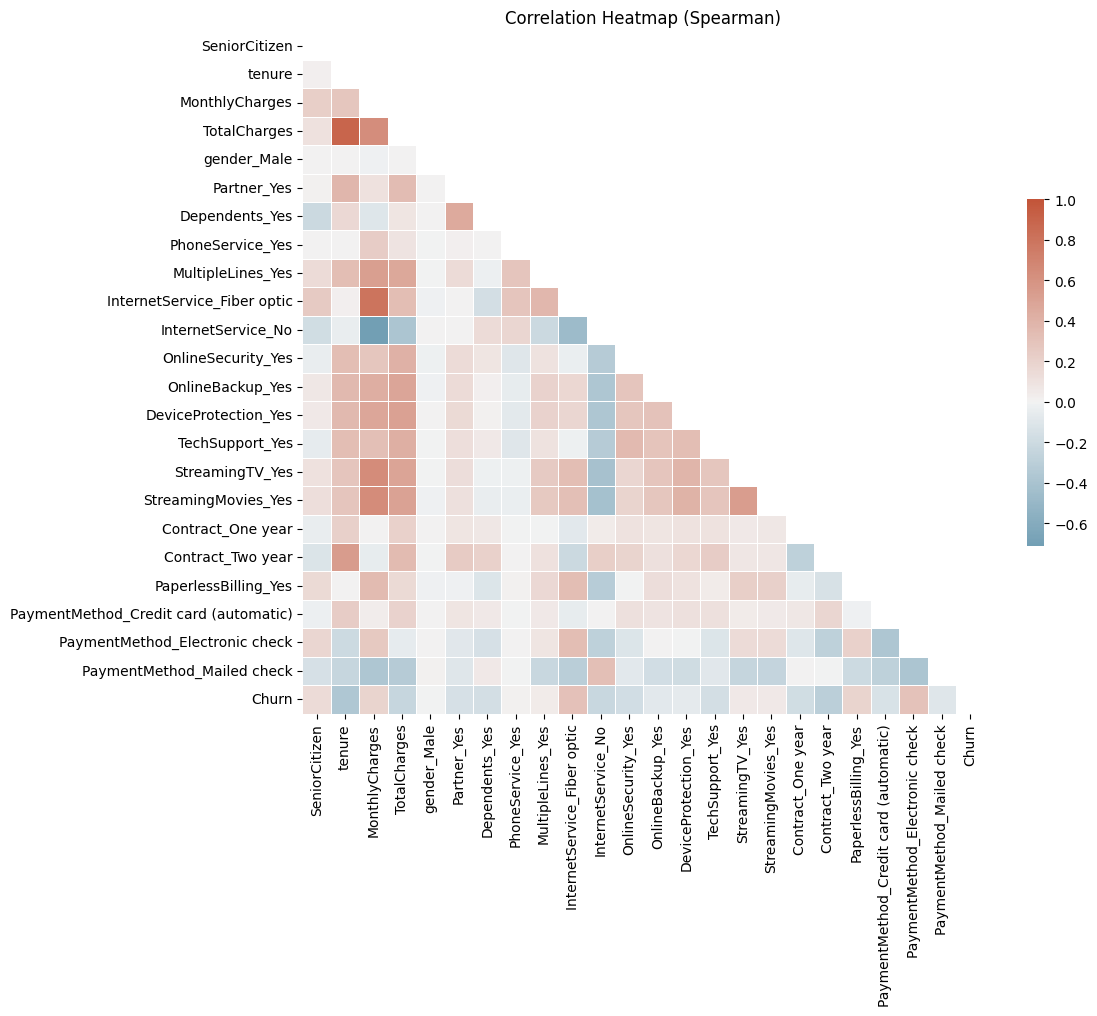

In [ ]:
# Compute the correlation matrix with Spearman method
corr = df_dropped.corr(method='spearman')

# Generate a mask for the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio, exclude the correlation values from the plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Heatmap (Spearman)')
plt.show()

# **Train, test, split** & mean imputation in tenure

In [ ]:
from sklearn.model_selection import train_test_split
X = df_dropped.drop(['Churn','customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fill in missing values in 'TotalCharges' with the mean from the training set
total_charges_mean = X_train['TotalCharges'].mean()
X_train['TotalCharges'].fillna(total_charges_mean, inplace=True)
X_test['TotalCharges'].fillna(total_charges_mean, inplace=True)

#**Standarization, log transformation**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def standardize_and_log_transform(X_train, X_test, numeric_cols):
    """
    Applies log1p transformation and then standardizes numeric columns in dataframes.

    Parameters:
        X_train: Training dataframe.
        X_test: Testing dataframe.
        numeric_cols: List of numeric column names.

    Returns:
        Dataframes with transformed and standardized columns.
    """

    scaler = StandardScaler()

    # Apply log1p transformation
    X_train[numeric_cols] = np.log1p(X_train[numeric_cols])
    X_test[numeric_cols] = np.log1p(X_test[numeric_cols])

    # Fit the scaler on the training data and transform both training and test data.
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

    return X_train, X_test

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train, X_test = standardize_and_log_transform(X_train, X_test, numeric_cols)


#**Step 7: XGBoost Model**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# The split was done earlier (step 3)

# Define the xgboost model
model = XGBClassifier()

params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


best_params = {'colsample_bytree': [1.0], 'gamma': [0.0], 'learning_rate': [0.1], 'max_depth': [3], 'min_child_weight': [3]}

In [ ]:
# Execute the grid search
grid_search = GridSearchCV(estimator=model, param_grid=best_params, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3}
Best score: 0.8446170797239869


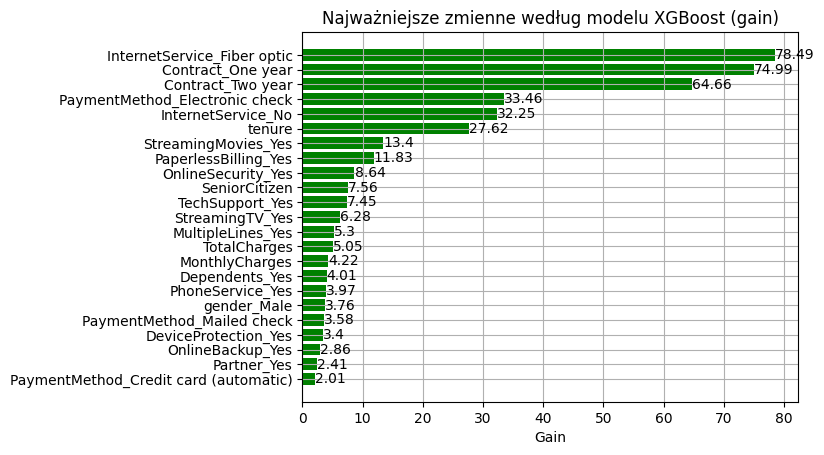

In [ ]:
import matplotlib.pyplot as plt

# Get the best model
best_model = grid_search.best_estimator_

# Get feature importance
feature_importance = best_model.get_booster().get_score(importance_type='gain')

# Round the values
feature_importance = {k: round(v, 2) for k, v in feature_importance.items()}

# Sort the features by importance
feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Create the plot
plt.barh(list(feature_importance.keys()), feature_importance.values(), color='g')
plt.xlabel('Gain')
plt.title('Najważniejsze zmienne według modelu XGBoost (gain)')

# Add the values next to the bars
for i, v in enumerate(feature_importance.values()):
    plt.text(v + 0.01, i, str(v), color='black', va='center')

# Add a grid
plt.grid(axis='both')

# Invert the y-axis to have the highest importance at the top
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Predict on the test set
y_pred = grid_search.predict_proba(X_test)[:,1]
y_pred_class = grid_search.predict(X_test)

y_prob_XGB = grid_search.predict_proba(X_test)[:,1]

# Calculate performance metrics
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# Rename model to XGB_model
XGB_model = grid_search

# Print the metrics
print("XGBoost")
print("\nROC-AUC: ", roc_auc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

XGBoost

ROC-AUC:  0.8622240106824557
Accuracy:  0.8119233498935415
Precision:  0.6824324324324325
Recall:  0.5415549597855228
F1 Score:  0.6038863976083708


# **Step 7a: Logistic Regression**

In [ ]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print("AUC with Logistic Regression:", roc_auc_score(y_test, y_prob_lr))

AUC with Logistic Regression: 0.8644598735081309


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF             = pd.DataFrame()
VIF['feature']  = X_train.columns
VIF['VIF']      = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF

,feature,VIF
0,SeniorCitizen,1.366560
1,tenure,34.237744
2,MonthlyCharges,28.305881
3,TotalCharges,46.188969
4,gender_Male,2.035309
5,Partner_Yes,2.806317
6,Dependents_Yes,1.966714
7,PhoneService_Yes,11.097169
8,MultipleLines_Yes,2.718171
9,InternetService_Fiber optic,6.391437


In [ ]:
mask = VIF['VIF'] > 10

features_with_mullticolinearity = list(VIF['feature'][mask])

In [ ]:
features_with_mullticolinearity

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'PhoneService_Yes',
 'InternetService_No']

In [ ]:
features_lr = list(np.setdiff1d(list(X_train.columns),features_with_mullticolinearity))

In [ ]:
X_train_lr = X_train[features_lr]
X_test_lr = X_test[features_lr]

In [ ]:
X_train_lr

,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,InternetService_Fiber optic,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,gender_Male
2142,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1623,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
6074,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1
1362,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
6754,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,1,0,1
5191,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0
5226,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1
5390,0,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1,0,1


# **Logistic Regression after (VIF > 10) variable elimination**

In [ ]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train_lr, y_train)
y_prob_lr = lr_model.predict_proba(X_test_lr)[:, 1]

print("AUC with Logistic Regression:", roc_auc_score(y_test, y_prob_lr))

AUC with Logistic Regression: 0.8377084476280185


In [ ]:
coefficients = lr_model.coef_

# Print the coefficients
print("Coefficients:", coefficients)

Coefficients: [[-1.29629484 -2.43810305 -0.17389534 -0.05135069  0.83382426 -0.05990925
  -0.28399652 -0.45715011  0.37355306 -0.16772985 -0.08212859  0.53057304
   0.11227772  0.12322004  0.29116332  0.19266269 -0.28746878 -0.06488726]]


# **Decision Tree, Random Forset**

All variables (no VIF applied)

In [ ]:
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train,y_train)

y_prob_dc = dc_model.predict_proba(X_test)[:,1]
print("AUC with Decision Tree Model:",roc_auc_score(y_test,y_prob_dc))

AUC with Decision Tree Model: 0.6342281097643028


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfr_model = RandomForestClassifier()
rfr_model.fit(X_train,y_train)

y_prob_rfr = rfr_model.predict_proba(X_test)[:,1]
print("AUC by RandomForest:",roc_auc_score(y_test,y_prob_rfr))

AUC by RandomForest: 0.8394694483836576


# **LASSO, SVM**

In [ ]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')

lasso_model.fit(X_train, y_train)

y_prob_lasso = lasso_model.predict_proba(X_test)[:,1]
print("AUC by LASSO:",roc_auc_score(y_test,y_prob_lasso))

AUC by LASSO: 0.8644314076619707


In [ ]:
from sklearn import svm
from sklearn.metrics import roc_auc_score

# Create the SVM classifier
svm_model = svm.SVC(kernel='linear', probability=True)

# Train the classifier
svm_model.fit(X_train, y_train)

# Get predicted probabilities
y_prob_svm = svm_model.predict_proba(X_test)[:,1]

# Compute AUC
print("AUC by SVM:", roc_auc_score(y_test, y_prob_svm))


AUC by SVM: 0.861719388864161


#  **Modelowanie ze SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
lr_model_res = LogisticRegression(max_iter = 1000)
lr_model_res.fit(X_res, y_res)
y_prob_lr_res = lr_model_res.predict_proba(X_test)[:, 1]

print("AUC with Logistic Regression SMOTE:", roc_auc_score(y_test, y_prob_lr_res))

AUC with Logistic Regression SMOTE: 0.8556975684991771


In [ ]:
dc_model_res = DecisionTreeClassifier()
dc_model_res.fit(X_res,y_res)

y_prob_dc_res = dc_model_res.predict_proba(X_test)[:,1]
print("AUC with Decision Tree Model SMOTE:",roc_auc_score(y_test,y_prob_dc_res))

AUC with Decision Tree Model SMOTE: 0.6742730858012359


In [ ]:
rfr_model_res = RandomForestClassifier()
rfr_model_res.fit(X_res,y_res)

y_prob_rfr_res = rfr_model_res.predict_proba(X_test)[:,1]
print("AUC by RandomForest SMOTE:",roc_auc_score(y_test,y_prob_rfr_res))

AUC by RandomForest SMOTE: 0.8339703644663431


In [ ]:
import xgboost as xgb

XGB_model_res = xgb.XGBClassifier(
    # n_estimators=100,  # Number of boosting rounds (trees)
    # max_depth=3,        # Maximum depth of each tree
    # learning_rate=0.1,  # Step size shrinkage during tree building
    # random_state=42     # For reproducibility

    colsample_bytree = 1.0, gamma = 0.0, learning_rate = 0.1, max_depth = 3, min_child_weight = 3
)

XGB_model_res.fit(X_res, y_res)
y_prob_XGB_res = XGB_model_res.predict_proba(X_test)[:,1]
print("AUC by XGBoost SMOTE:",roc_auc_score(y_test,y_prob_XGB_res))

AUC by XGBoost SMOTE: 0.8559977537859575


In [ ]:
lasso_model_res = LogisticRegression(penalty='l1', solver='liblinear')

lasso_model.fit(X_res, y_res)

y_prob_lasso_res = lasso_model.predict_proba(X_test)[:,1]
print("AUC by LASSO SMOTE:",roc_auc_score(y_test,y_prob_lasso_res))

AUC by LASSO SMOTE: 0.8552550539815955


In [ ]:
from sklearn import svm
from sklearn.metrics import roc_auc_score

# Create the SVM classifier
svm_model_res = svm.SVC(kernel='linear', probability=True)

# Train the classifier on resampled data
svm_model_res.fit(X_res, y_res)

# Get predicted probabilities
y_prob_svm_res = svm_model.predict_proba(X_test)[:,1]

# Compute AUC
print("AUC by SVM with SMOTE:", roc_auc_score(y_test, y_prob_svm_res))


AUC by SVM with SMOTE: 0.861719388864161


# **Step 8: Evaluation**

In [ ]:
def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

In [ ]:
from sklearn.metrics import matthews_corrcoef, make_scorer, accuracy_score, precision_score, recall_score

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(calculate_specificity, needs_threshold=True),
    'f1': make_scorer(f1_score),
    'auc': make_scorer(roc_auc_score, max_fpr=0.001, needs_proba=True),
    'MCC': make_scorer(matthews_corrcoef)
}

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

def find_best_threshold(y_true, y_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)

    # ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc_score(y_true, y_prob))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # PR curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='r', label='Precision-Recall curve (area = %0.2f)' % auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    # Find the best threshold based on the PR curve
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold_pr = thresholds_pr[np.argmax(f1_scores)]

    return best_threshold_pr

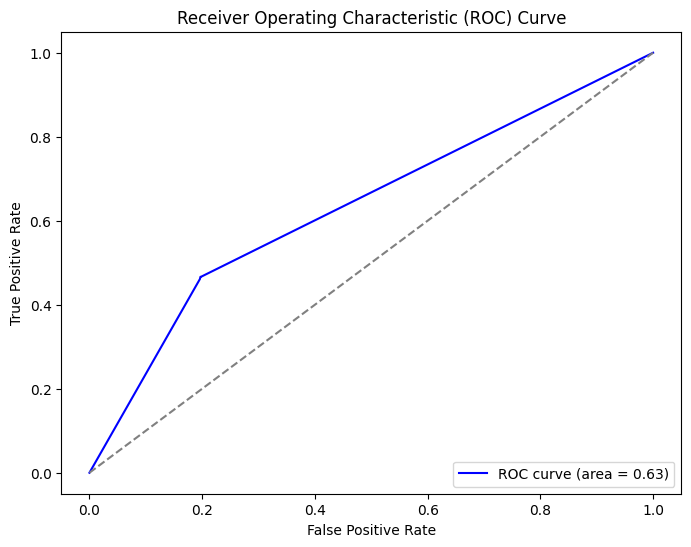

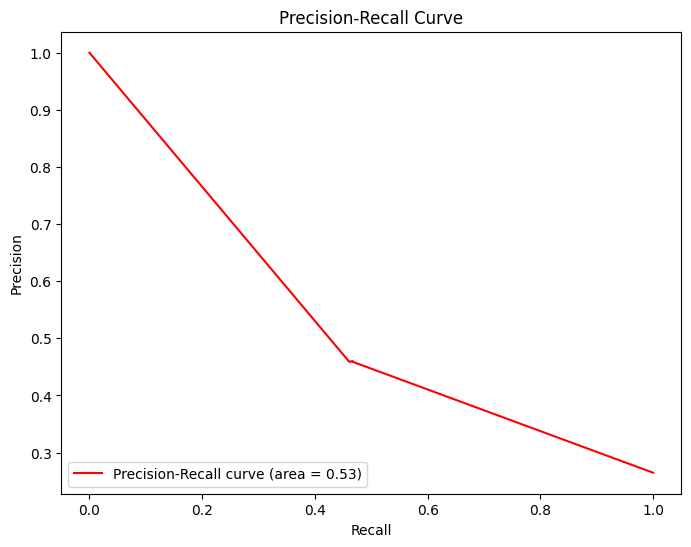

In [ ]:
best_threshold = find_best_threshold(y_test, y_prob_dc)

In [ ]:
def calculate_metrics(true_labels, predicted_probs, model_label, best_threshold):
    # Convert probabilities to class labels (0 or 1) based on a threshold of 0.5
    predicted_labels = [1 if prob >= best_threshold else 0 for prob in predicted_probs]

    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Precision
    precision = precision_score(true_labels, predicted_labels)

    # Recall (Sensitivity)
    recall = recall_score(true_labels, predicted_labels)

    # Confusion matrix to calculate True Negatives for Specificity
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

    # Specificity (True Negative Rate)
    specificity = tn / (tn + fp)

    # F1 Score
    f1 = f1_score(true_labels, predicted_labels)

    # AUC
    auc = roc_auc_score(true_labels, predicted_probs)

    # MCC
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    metrics_dict = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'specificity': specificity, 'f1': f1, 'auc': auc, 'mcc' : mcc}
    return pd.DataFrame(metrics_dict,index=[model_label])

In [ ]:
models = {'lr_model': y_prob_lr,
          'dc_model': y_prob_dc,
          'rfr_model': y_prob_rfr,
          'XGB_model': y_prob_XGB,
          'lasso_model': y_prob_lasso,
          'svm_model': y_prob_svm,
          'lr_model_res': y_prob_lr_res,
          'dc_model_res': y_prob_dc_res,
          'rfr_model_res': y_prob_rfr_res,
          'XGB_model_res': y_prob_XGB_res,
          'lasso_model_res': y_prob_lasso_res,
          'svm_model_res': y_prob_svm_res
         }

In [ ]:
metrics_df = pd.DataFrame({'accuracy': [], 'precision': [], 'recall': [], 'specificity': [], 'f1': [], 'auc': [], 'mcc' : []})

In [ ]:
from sklearn.metrics import confusion_matrix

for model_label, predicted_probs in models.items():
    metrics_df = pd.concat([metrics_df, calculate_metrics(y_test, predicted_probs, model_label, best_threshold)])

In [ ]:
metrics_df

,accuracy,precision,recall,specificity,f1,auc,mcc
lr_model,0.796309,0.640523,0.525469,0.893822,0.577320,0.837708,0.448644
dc_model,0.713982,0.460317,0.466488,0.803089,0.463382,0.634228,0.268436
rfr_model,0.789922,0.637993,0.477212,0.902510,0.546012,0.839469,0.420396
XGB_model,0.811923,0.682432,0.541555,0.909266,0.603886,0.862224,0.488253
lasso_model,0.813343,0.677419,0.563003,0.903475,0.614934,0.864431,0.496804
svm_model,0.806246,0.671233,0.525469,0.907336,0.589474,0.861719,0.471095
lr_model_res,0.766501,0.539427,0.806971,0.751931,0.646617,0.855698,0.504182
dc_model_res,0.718950,0.474725,0.579088,0.769305,0.521739,0.674273,0.328719
rfr_model_res,0.784954,0.582160,0.664879,0.828185,0.620776,0.833970,0.473649
XGB_model_res,0.760114,0.531083,0.801609,0.745174,0.638889,0.855998,0.492504


# **ROC Curve**

In [ ]:
models_unbalanced = {'lr_model': y_prob_lr,
          'dc_model': y_prob_dc,
          'rfr_model': y_prob_rfr,
          'XGB_model': y_prob_XGB,
          'lasso_model': y_prob_lasso,
          'svm_model': y_prob_svm
         }
models_smote = {
          'lr_model_res': y_prob_lr_res,
          'dc_model_res': y_prob_dc_res,
          'rfr_model_res': y_prob_rfr_res,
          'XGB_model_res': y_prob_XGB_res,
          'lasso_model_res': y_prob_lasso_res,
          'svm_model_res': y_prob_svm_res
}

In [ ]:
# Create a figure and axis to plot the ROC curve
def roc_curve_models(models):
    plt.figure(figsize=(10, 8))
    plt.title('Receiver Operating Characteristic - Krzywa ROC ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Iterate through each model's probabilities, calculate ROC curve, and plot it
    for model_name, y_prob in models.items():
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot the random guess line (dashed)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

    # Set axis limits and add a legend
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')

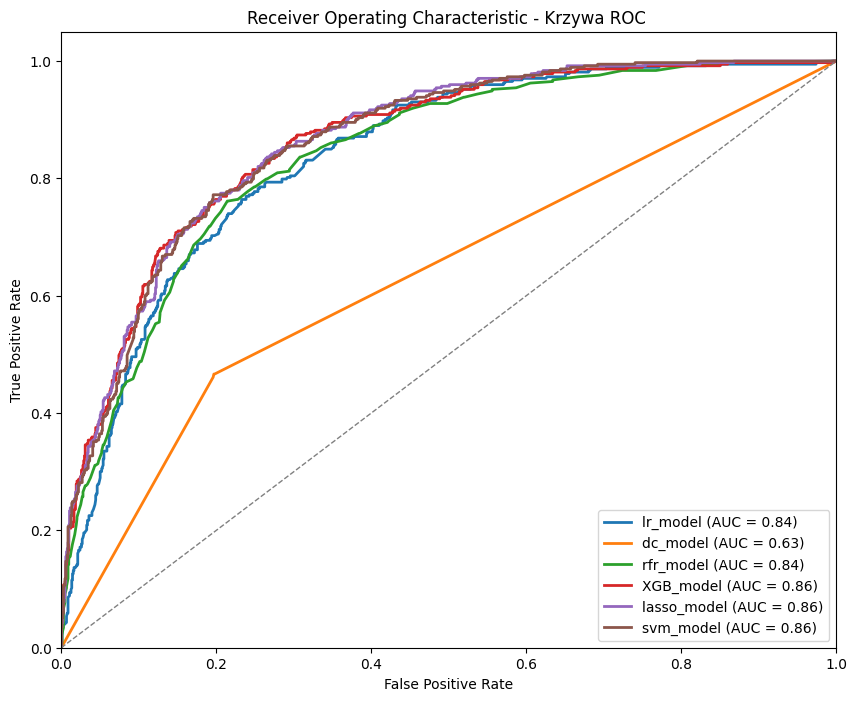

In [ ]:
roc_curve_models(models_unbalanced)

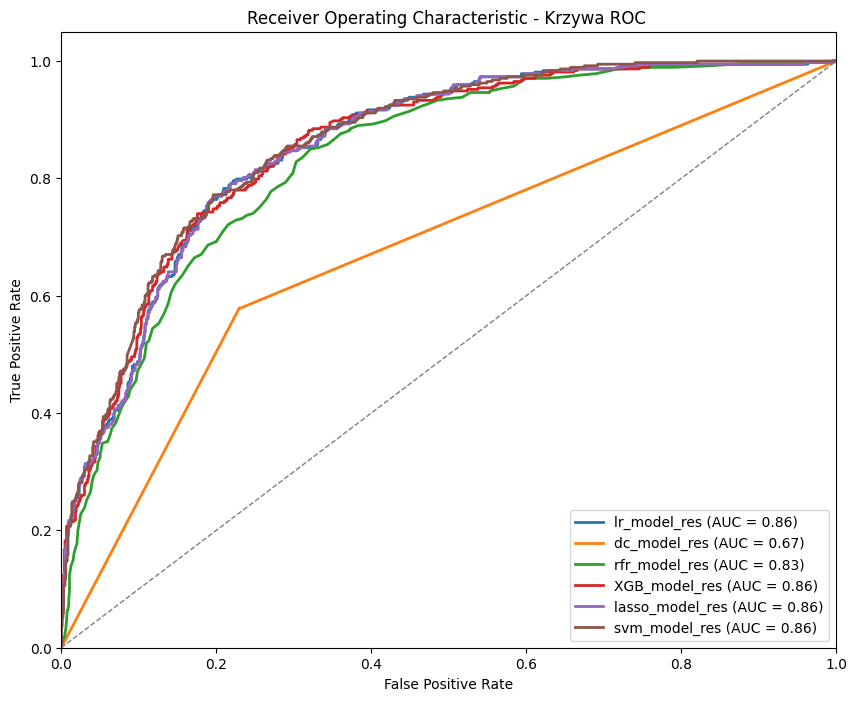

In [ ]:
roc_curve_models(models_smote)

## **confusion matrix**

In [ ]:
models = {'lr_model': y_prob_lr,
          'dc_model': y_prob_dc,
          'rfr_model': y_prob_rfr,
          'XGB_model': y_prob_XGB,
          'lasso_model': y_prob_lasso,
          'svm_model': y_prob_svm,
          'lr_model_res': y_prob_lr_res,
          'dc_model_res': y_prob_dc_res,
          'rfr_model_res': y_prob_rfr_res,
          'XGB_model_res': y_prob_XGB_res,
          'lasso_model_res': y_prob_lasso_res,
          'svm_model_res': y_prob_svm_res
         }

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

def find_best_threshold(y_true, y_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)

    # ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc_score(y_true, y_prob))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # PR curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='r', label='Precision-Recall curve (area = %0.2f)' % auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    # Find the best threshold based on the PR curve
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold_pr = thresholds_pr[np.argmax(f1_scores)]

    return best_threshold_pr

In [ ]:
def confustion_matrix_plot_model_test(models_proba, best_threshold = best_threshold, dict_of_plots = {}):
    for i, key in enumerate(models_proba.keys()):
        y_pred = [1 if prob >= best_threshold else 0 for prob in models_proba[key]]
        if i % 2 == 0:
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            cm = confusion_matrix(y_test, y_pred)
            plot_confusion_matrix(cm, classes=class_labels, title=str('Macierz błędów ' + key), cmap=plt.cm.Greens)

        else:
            plt.subplot(1, 2, 2)
            cm = confusion_matrix(y_test, y_pred)
            plot_confusion_matrix(cm, classes=class_labels, title=str('Macierz błędów ' + key), cmap=plt.cm.Greens)
            plt.savefig(str('Macierz błędów ' + key + '.pdf'),format='pdf')
            plt.show()

In [ ]:
confustion_matrix_plot_model_test(models_proba_test)

# **Feature importance**

In [ ]:
# Get the coefficients for the linear SVM model.
svm_coef = svm_model_res.coef_[0]

# Get the indices of the top 20 coefficients sorted in descending order by absolute value.
top_20_indices = np.argsort(np.abs(svm_coef))[::-1][:20]

# Get the corresponding top 20 coefficients.
top_20_coefficients = svm_coef[top_20_indices]

# Get the names of the top 20 features based on their indices.
top_20_feature_names = [feature_names[i] for i in top_20_indices]

In [ ]:
importances

array([-0.04110365, -0.1254107 ,  0.14309193, -0.16955169, -0.17592479,
       -0.19827713, -0.24042724, -0.35100214, -0.37354727, -0.48155874,
       -0.62038249, -0.63713485, -0.66108803, -0.69109545, -0.84019821,
       -0.90595705, -1.00012672,  1.15623244, -2.0845054 , -2.12587307,
       -2.35636385,  2.85803917,  3.5308169 ])

In [ ]:
feature_names[indices]

Index(['Partner_Yes', 'MultipleLines_Yes', 'PaperlessBilling_Yes',
       'gender_Male', 'PaymentMethod_Electronic check', 'SeniorCitizen',
       'StreamingMovies_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes',
       'Dependents_Yes', 'OnlineBackup_Yes', 'PaymentMethod_Mailed check',
       'PaymentMethod_Credit card (automatic)', 'InternetService_Fiber optic',
       'TechSupport_Yes', 'Contract_One year', 'OnlineSecurity_Yes', 'tenure',
       'Contract_Two year', 'TotalCharges', 'PhoneService_Yes',
       'InternetService_No', 'MonthlyCharges'],
      dtype='object')

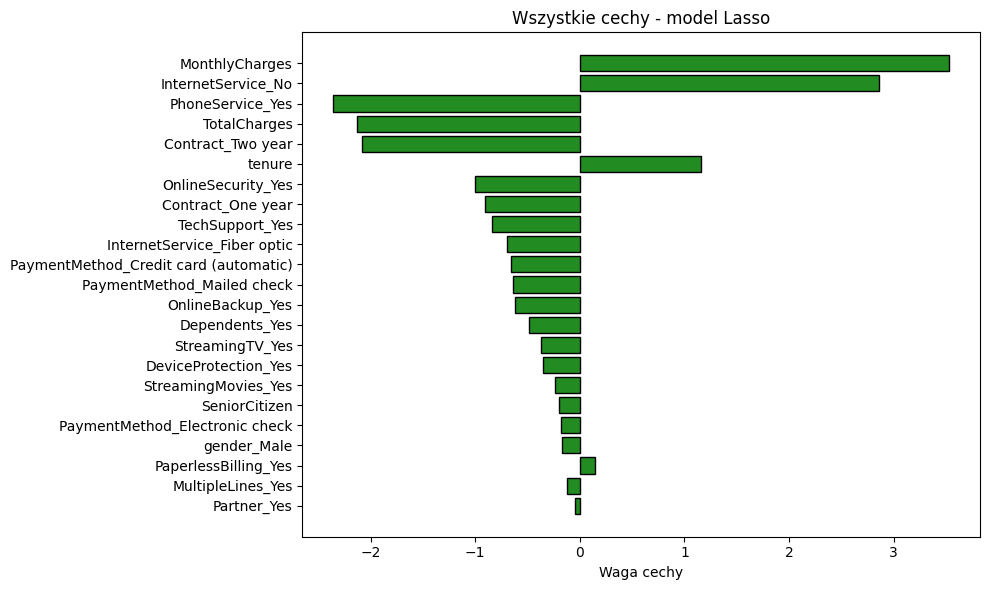

In [ ]:
# Uzyskanie współczynników
importance = lasso_model.coef_[0]

# Uzyskanie nazw cech
feature_names = X_train.columns

# Sortowanie indeksów współczynników według ich wartości absolutnych
indices = np.argsort(np.abs(importance))

# Uzyskanie wartości i nazw dla wszystkich cech
importances = importance[indices]
feature_names_sorted = feature_names[indices]

# Wykres
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, tick_label=feature_names_sorted, color='forestgreen', edgecolor='black')
plt.xlabel('Waga cechy')
plt.title('Wszystkie cechy - model Lasso')
plt.tight_layout()
plt.show()



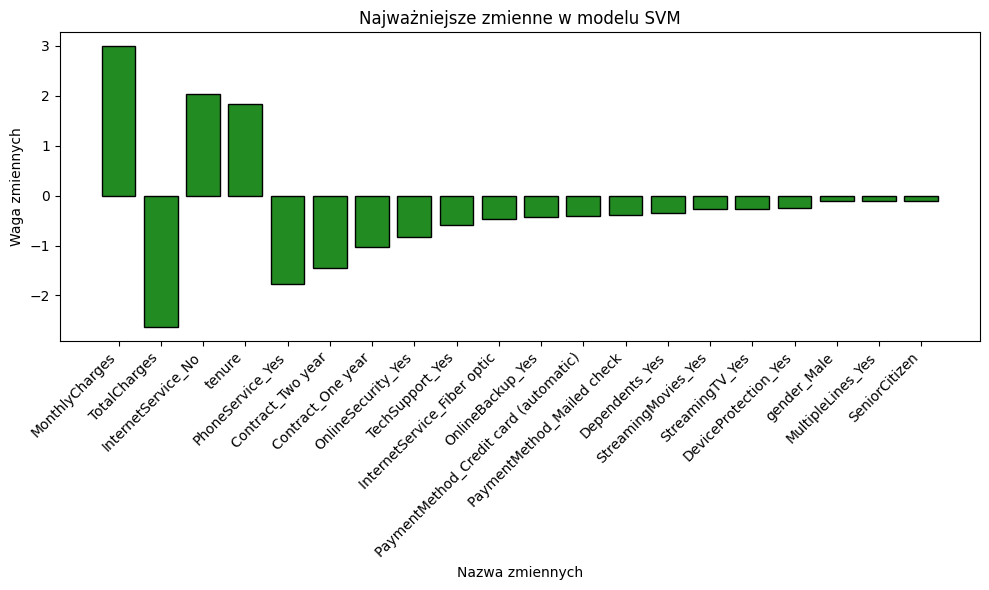

In [ ]:
# Get the coefficients for the linear SVM model.
svm_coef = svm_model_res.coef_[0]

# Get the indices of the top 20 coefficients sorted in descending order by absolute value.
top_20_indices = np.argsort(np.abs(svm_coef))[::-1][:20]

# Get the corresponding top 20 coefficients.
top_20_coefficients = svm_coef[top_20_indices]

# Get the names of the top 20 features based on their indices.
top_20_feature_names = [feature_names[i] for i in top_20_indices]

# Plot the top 20 coefficients.
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_20_coefficients)), top_20_coefficients, tick_label=top_20_feature_names, color='forestgreen', edgecolor='black')
plt.xlabel('Nazwa zmiennych')
plt.ylabel('Waga zmiennych')
plt.title('Najważniejsze zmienne w modelu SVM')
plt.xticks(rotation=45, horizontalalignment='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



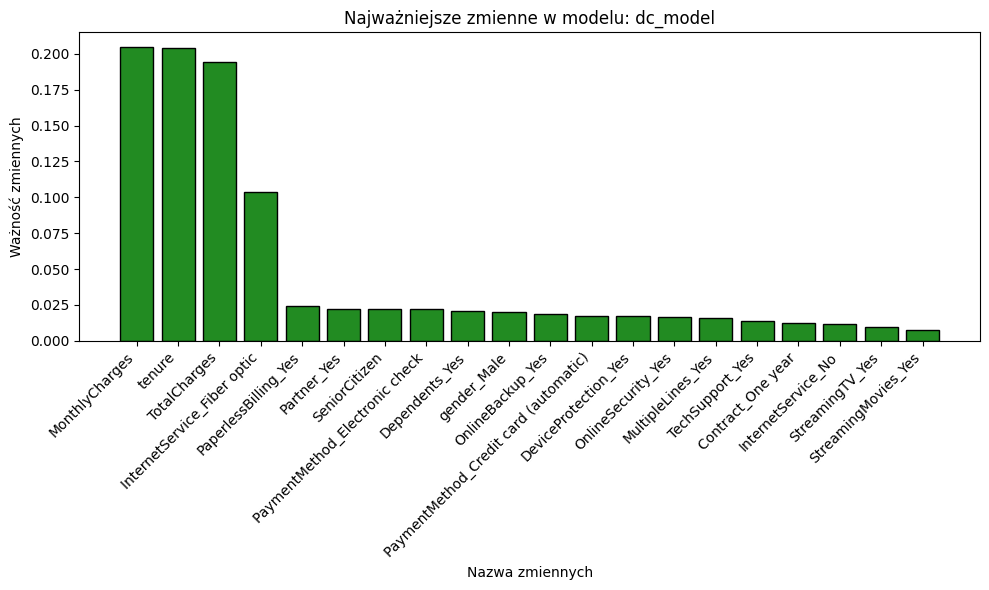

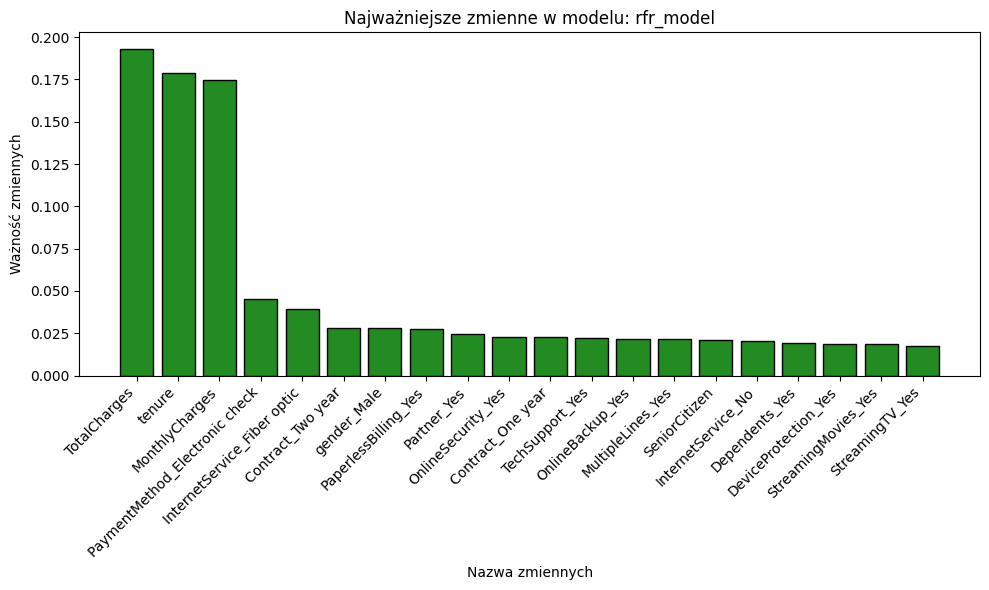

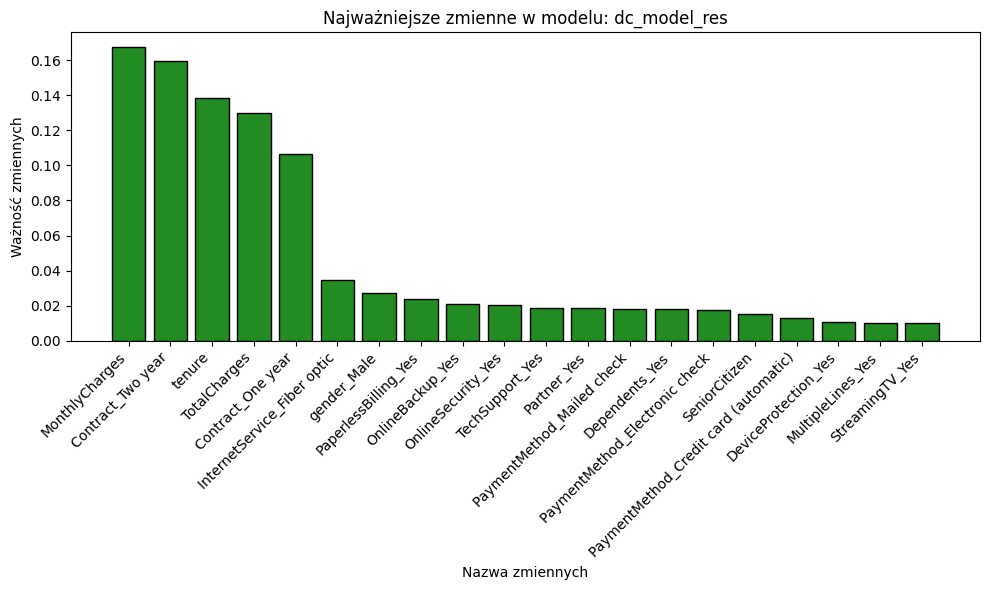

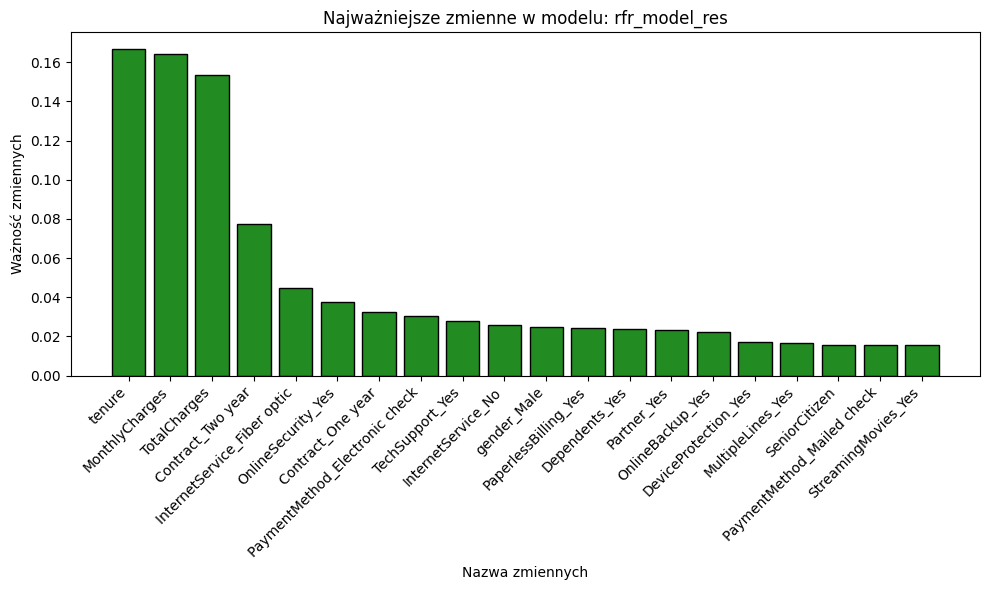

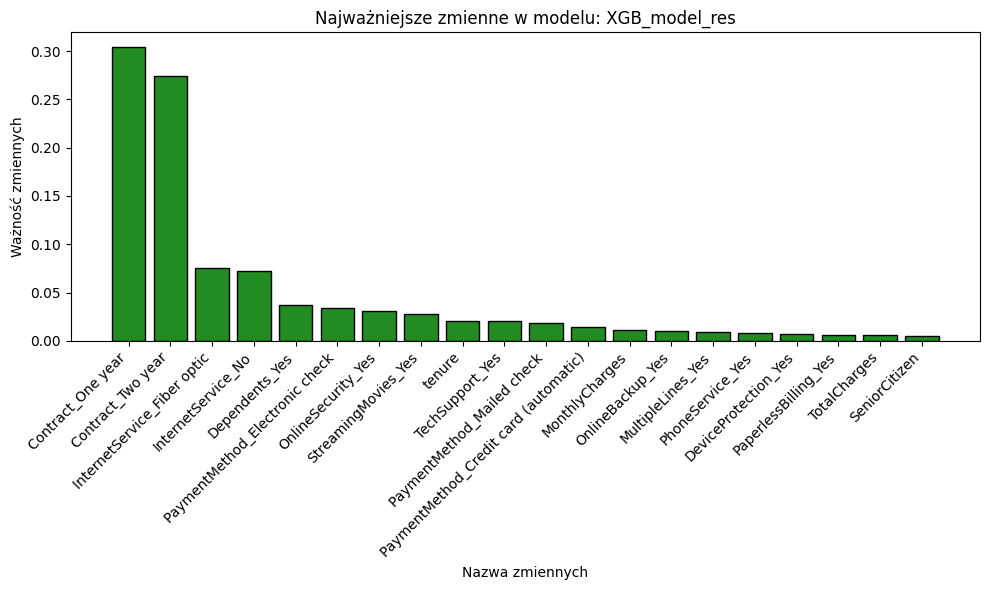

In [ ]:
# Initialize a dictionary to store the top 20 feature importances and names for each model.
feature_names = list(X_train.columns)
top_20_feature_importances = {}

# Loop through each model in the 'models' dictionary.
for model_name, model in models_.items():
    # Check if the model is tree-based and has the 'feature_importances_' attribute.
    if hasattr(model, 'feature_importances_'):
        # Get the feature importances for the model.
        feature_importance = model.feature_importances_
        # Get the indices of the top 20 features sorted in descending order.
        top_20_indices = feature_importance.argsort()[::-1][:20]
        # Get the corresponding top 20 feature importances.
        top_20_importances = feature_importance[top_20_indices]
        # Get the names of the top 20 features based on their indices.
        top_20_feature_names = [feature_names[i] for i in top_20_indices]
        # Store the top 20 feature importances and names in the 'top_20_feature_importances' dictionary.
        top_20_feature_importances[model_name] = (top_20_importances, top_20_feature_names)

# Create plots for each model's top 20 feature importances.
for model_name, (importances, names) in top_20_feature_importances.items():
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances, tick_label=names, color='forestgreen', edgecolor='black')
    plt.xlabel('Nazwa zmiennych')
    plt.ylabel('Ważność zmiennych')
    plt.title(f'Najważniejsze zmienne w modelu: {model_name}')
    plt.xticks(rotation=45, horizontalalignment='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()